In [3]:
pip install pandas

     ---------------------------------------- 10.6/10.6 MB 3.6 MB/s eta 0:00:00
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
     ---------------------------------------- 14.8/14.8 MB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

Reading the file from the train.csv and storing it in a dataframe df_titanic

In [5]:
df_titanic = pd.read_csv("D:\\Machine Learning Modelling Projects\\titanic\\train.csv")

In [6]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The Titanice Dataset contains of 12 features and 891 instances.

In [7]:
df_titanic.shape

(891, 12)

The following shows all the features that are part of the Titanic Dataset

In [8]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The following shows the datatype of each features which are part of the Titanic Dataset

In [9]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The below helps in understanding the statistical summary on the titanic dataset and we can observe the following:-
- There are 891 passenger details available with us in the dataset
- The average survival percentage is 38%
- The youngest travelling was around .4 months and the oldest being 80 years old.
- The minmum fare of travelling into the Titanic ship was 32.2 and the most expensive one was 512

We can also identify some dicrepencies which are listed below:-
- There are only 714 records in the 'Age', which means there are some missing values.
- The maximum value for 'Fare' is way to higher then the mean and the 3rd interquartile, which suggest that there are some outliers

In [11]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Cleanining : In this stage, we will be involved in identfying the following:-
1) Missing Values in the Dataset
2) Duplicate Values
3) Outlier if any

Along with the identification we will also handle each situtaions accordingly

In [19]:

# To identify the number of null values in each columns
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df_titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [24]:
df_titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       889
dtype: int64

We have identified the following columns for the missing values - [Age, Cabin, Embarked]
- Age:- we will impute the missing values using the median
- Cabin:- We will drop this columns, since there are too many missing values
- Embarked:- In this we will impute the missing values 

In [20]:
# Imputing the missing values in the 'Age' columns with the median
df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)

In [23]:
# Dropping the 'Cabin' column since there are too many missing values
df_titanic.drop('Cabin', axis = 1, inplace=True)

In [26]:
#Imputing the missing values in the 'Embarked' columns with the mode. 
mode_value = df_titanic['Embarked'].mode()[0]
mode_value
df_titanic['Embarked'].fillna(mode_value, inplace=True)

'S'

In the below steps we will be identifying if there is any duplicate records in the dataset

In [28]:
print(df_titanic.duplicated().sum())

0


Outlier Detection: In this section we will try to identify the outliers and then handle it accordingly

In [30]:
pip install matplotlib


     ---------------------------------------- 7.6/7.6 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 5.5 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import matplotlib as plt

In [43]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import numpy as np

In [45]:
pip install seaborn

     -------------------------------------- 293.3/293.3 kB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import seaborn as sns

<Axes: xlabel='Fare'>

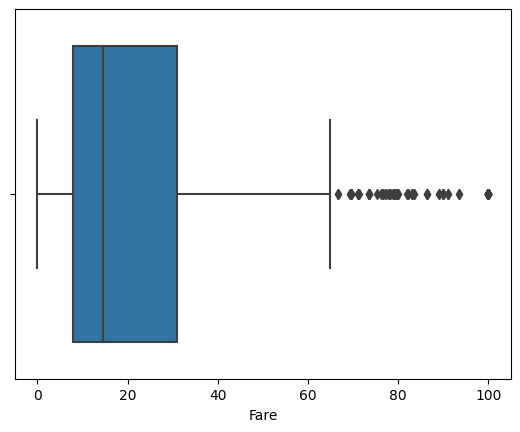

In [47]:
sns.boxplot(x=df_titanic['Fare'])

In [51]:
Q1 = df_titanic['Fare'].quantile(0.25)
Q3 = df_titanic['Fare'].quantile(0.75)
IQR = Q3-Q1

outliers = df_titanic[(df_titanic['Fare'] < Q1 - 1.5 * IQR) | (df_titanic['Fare'] > Q3 + 1.5 * IQR)]
print("Number of Outliers : ", len(outliers))

Number of Outliers :  116


In [41]:
df_titanic['Fare'] = df_titanic['Fare'].clip(upper = 100)